<a href="https://colab.research.google.com/github/aSafarpoor/Udemy---Graph-Neural-Network-2021-6/blob/main/Week1_simple_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 13.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 9.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 7.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.9/873.9 KB 3.9 M

In [5]:
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.utils.convert import to_networkx

In [6]:
# a graph with 4 nodes
edge_list = torch.tensor([
                         [0, 0, 0, 1, 2, 2, 3, 3], # Source Nodes
                         [1, 2, 3, 0, 0, 3, 2, 0]  # Target Nodes
                        ], dtype=torch.long)

# 6 Features for each node (4x6 - Number of nodes x NUmber of features)

node_features = torch.tensor([
                            [-8, 1, 5, 8, 2, -3], # Features of Node 0
                            [-1, 0, 2, -3, 0, 1], # Features of Node 1
                            [1, -1, 0, -1, 2, 1], # Features of Node 2
                            [0, 1, 4, -2, 3, 4], # Features of Node 3
                            ],dtype=torch.long)

# 1 Weight for each edge 

edge_weight = torch.tensor([
                            [35.], # Weight for nodes (0,1)
                            [48.], # Weight for nodes (0,2)
                            [12.], # Weight for nodes (0,3)
                            [10.], # Weight for nodes (1,0)
                            [70.], # Weight for nodes (2,0)
                            [5.], # Weight for nodes (2,3)
                            [15.], # Weight for nodes (3,2)
                            [8.], # Weight for nodes (3,0)   
                            ],dtype=torch.long)

<ipython-input-6-a8a13a49938a>:18: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  edge_weight = torch.tensor([


In [7]:
# Make a data object to store graph informaiton 
data = Data(x=node_features, edge_index=edge_list, edge_attr=edge_weight)


In [8]:
" Print the graph info "
print("Number of nodes: ", data.num_nodes)
print("Number of edges: ",data.num_edges)
print("Number of features per node (Length of feature vector): ", data.num_node_features,"\n")
print("Number of weights per edge (edge-features): ", data.num_edge_features, "\n")

Number of nodes:  4
Number of edges:  8
Number of features per node (Length of feature vector):  6 

Number of weights per edge (edge-features):  1 



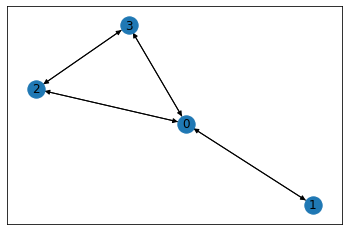

In [9]:
" Plot the graph "

G = to_networkx(data)
nx.draw_networkx(G)

In [10]:
import random

In [38]:
n = 150
temp = [[random.randint(0,100) for x in range(n)] for y in range(2)]
edge_list = torch.tensor(temp[:], dtype=torch.long)

In [39]:
n = 100
temp = [[random.randint(-10,10) for x in range(5)] for y in range(n)]
node_features = torch.tensor(temp[:], dtype=torch.long)

In [40]:
n = 300
temp = [[random.randint(0,100) for x in range(1)] for y in range(n)]
edge_weight = torch.tensor(temp[:], dtype=torch.long)

In [41]:
# Make a data object to store graph informaiton 
data = Data(x=node_features, edge_index=edge_list, edge_attr=edge_weight)

In [42]:
" Print the graph info "
print("Number of nodes: ", data.num_nodes)
print("Number of edges: ",data.num_edges)
print("Number of features per node (Length of feature vector): ", data.num_node_features,"\n")
print("Number of weights per edge (edge-features): ", data.num_edge_features, "\n")

Number of nodes:  100
Number of edges:  150
Number of features per node (Length of feature vector):  5 

Number of weights per edge (edge-features):  1 



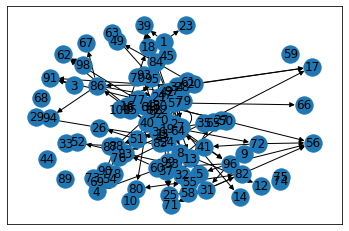

In [43]:
" Plot the graph "

G = to_networkx(data)
nx.draw_networkx(G)